
# Estrategias evolutivas

Optimización de la función de rastrigin:

- 20 dimensiones
- 100 individuos
- Cien mil iteraciones
- 30 experimentos (corridas)

Se definió el valor de la desviación estándar $\sigma=3$ para todos las dimensiones en los individuos.
La probabilidad de mutación se definió en $0.5$

Procedimiento: 

1. Se inicializa aleatoriamente con distribución uniforme la población.
2. Siguiente generación:
    1. Se eligen al azar (uniforme) tres individuos (padres).
    2. La combinación es el promedio de los tres vectores padres.
    3. Mutación:
        1. Para cada dimensión se toma un número aleatorio (0-1)
        2. Si el valor es menor a la probabilidad de mutación, se le suma un número seleccionado aleatoriamente de la distribución normal, con promedio $0$ y desviación estándar $\sigma$
        2. se le suma a la base el resultado del vector multiplicado por $F$
    3. Se seleccionan por ranking entre los padres y los hijos  los 100 mejores individuos para la siguiente generación.
3. Iterar

In [27]:
import numpy as np
import pandas as pd
import random
import math
import csv
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from multiprocessing import Pool

import time
import copy

In [9]:
n_dims=20
cant_indiv=100
iteraciones=100000
iter_experimentos=30
sigma_param=3
pr_mutac=0.5
n_reports=20
n_parents=3
min_factible=-5.12 
max_factible=5.12

In [10]:
def rastrigin(X_array, A=10, m=0):
    n=len(X_array)
    y=A*n+(sum([(x_val**2)-(A*math.cos(2*math.pi*x_val))for x_val in X_array]))
    return y

# Generar un vector de n_dims dimensiones entre los valores factibles.
def rand_vec():
    X_array=[random.uniform(min_factible,max_factible) for i in range(n_dims)]
    return np.array(X_array)

def limit_vec(vector):
    for dim in xrange(n_dims):
        if vector[dim]<-5.12:
            vector[dim]=-5.12
        if vector[dim]>5.12:
            vector[dim]=5.12
    return vector

def get_best_vec_fit(populat):
    # Devuelve el mejor vector (mínimo) fitness de la población (las coordenadas, junto con el fitness).
    fit_init=[rastrigin(list(init)) for init in populat]
    ith_best=fit_init.index(min(fit_init))
    return [list(populat[ith_best]),fit_init[ith_best]]

In [11]:
def fili_vec(population):
    # Toma el conjunto de n_padres, los recombina con el promedio (centroide)
    # luego los muta con el parámetro sigma (cada coordenada según su probabilidad de mutación).
    recombined=np.array(random.sample(population,n_parents)).mean(axis=0)
    fili=np.array([coord+((random.random()<pr_mutac)*random.gauss(0, sigma_param)) for coord in recombined])
    return fili

def next_popul(population):
    #Devuelve una lista de tamaño n_indiv del ranking de los mejores entre padres e hijos
    hijos=[fili_vec(population) for ith_vec in population]
    A_B_inds=population+hijos
    fit_vec=[[ind_pop,rastrigin(ind_pop)] for ind_pop in A_B_inds]
    fit_vec.sort(key=lambda x: x[1])
    return list(np.array(fit_vec[:cant_indiv])[:,0])

In [12]:
'''
Crear n_corridas de poblaciones
iterar sobre cada población calculando el fitness del mejor y dejándolo avanzar tantas iteraciones como pueda.
'''
EstrEvol_start_time=time.time()

prim_gen=[[rand_vec()for i in xrange(cant_indiv)] for corr in xrange(iter_experimentos)]
best_nCorrds_mIters=[[get_best_vec_fit(ith_popul)[1] for ith_popul in prim_gen]]#Registra el fitness del mejor de cada población por cada iteración
best_nCorrds_mIters_bit=[get_best_vec_fit(ith_popul)[0] for ith_popul in prim_gen]#Registra el mejor individuo de cada población por cada iteración

for corrida in xrange(iteraciones):
    if __name__ == '__main__':
        pool = Pool()
        prim_gen=pool.map(next_popul,prim_gen)
        pool.close() 
        pool.join()
    
    #prim_gen=next_gen
    fit_dat=np.array([get_best_vec_fit(popul) for popul in prim_gen])# El mejor individuo con fitness de cada población para cada corrida
    best_popul=list(fit_dat[:,1])# Regstra el mejor fitness de cada población (dentro de la corrida)
    best_popul_bit=list(fit_dat[:,0])#registra el mejor individuo de cada población
    best_nCorrds_mIters.append(best_popul)
    best_corrida_bit=get_best_vec_fit(list(fit_dat[:,0]))
    best_nCorrds_mIters_bit.append(list(best_corrida_bit[0]))
       
    if corrida %(iteraciones/n_reports)==0:
        print(''.join(["iter: ",str(corrida),"/", str(iteraciones), "| best corrida Fitness: ",str(best_corrida_bit[1])]))
        np.savetxt("Results_1/EstrEvol.csv",np.array(best_nCorrds_mIters))
        with open("Results_1/EstrEvol_best_ind.csv", 'wb') as f:
            writer = csv.writer(f)
            [writer.writerow([best_bit])for best_bit in best_nCorrds_mIters_bit]

np.savetxt("Results_1/EstrEvol.csv",np.array(best_nCorrds_mIters))
with open("Results_1/EstrEvol_best_ind.csv", 'wb') as f:
    writer = csv.writer(f)
    [writer.writerow([best_bit])for best_bit in best_nCorrds_mIters_bit]

EstrEvol_end_time=time.time()
EstrEvol_exec_time=EstrEvol_end_time-EstrEvol_start_time
print "################################___________________ EXEC TIME:",str(EstrEvol_exec_time)

iter: 0/100000| best corrida Fitness: 180.761140237
iter: 5000/100000| best corrida Fitness: 71.6094943706
iter: 10000/100000| best corrida Fitness: 71.6094943706
iter: 15000/100000| best corrida Fitness: 70.4668887751
iter: 20000/100000| best corrida Fitness: 70.4668887751
iter: 25000/100000| best corrida Fitness: 70.4668887751
iter: 30000/100000| best corrida Fitness: 70.4668887751
iter: 35000/100000| best corrida Fitness: 70.4668887751
iter: 40000/100000| best corrida Fitness: 70.4668887751
iter: 45000/100000| best corrida Fitness: 70.4668887751
iter: 50000/100000| best corrida Fitness: 70.4668887751
iter: 55000/100000| best corrida Fitness: 70.4668887751
iter: 60000/100000| best corrida Fitness: 70.4668887751
iter: 65000/100000| best corrida Fitness: 65.4225215621
iter: 70000/100000| best corrida Fitness: 65.4225215621
iter: 75000/100000| best corrida Fitness: 65.4225215621
iter: 80000/100000| best corrida Fitness: 65.4225215621
iter: 85000/100000| best corrida Fitness: 65.42252156

In [20]:
data=np.loadtxt("Results_1/EstrEvol.csv")
best=[]
worst=[]
mean=[]
median=[]
std_median=[]

for iterac in data:
    best.append(min(iterac))
    worst.append(max(iterac))
    mean.append(np.mean(iterac))
    median.append(np.median(iterac))
    std_median.append(np.sqrt(sum([(fit-np.median(iterac))**2 for fit in iterac])/len(iterac)))

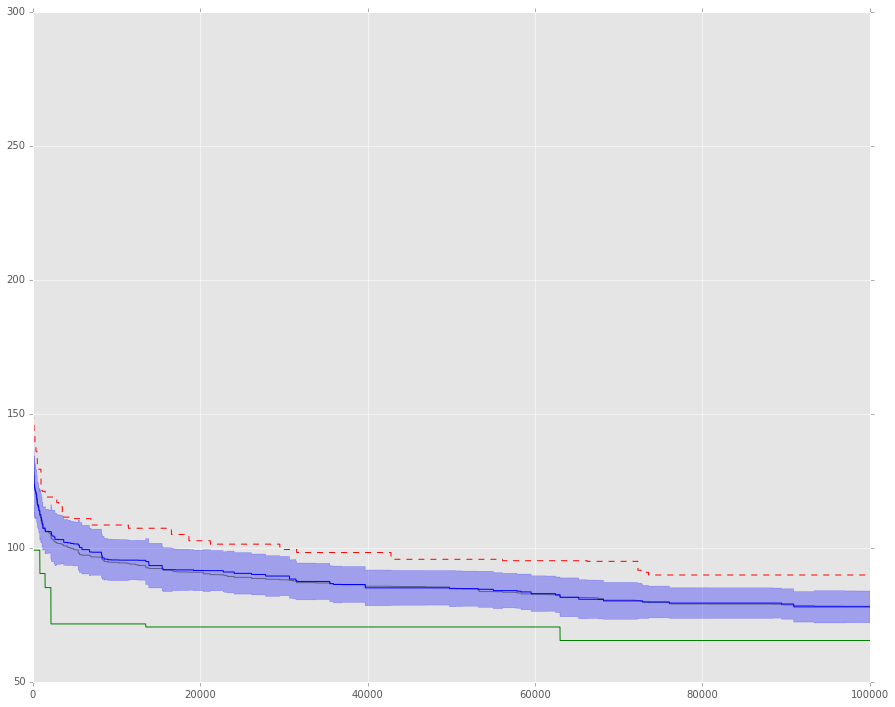

In [21]:
plt.figure(figsize=(15,12))
plt.plot(best, "g")
plt.plot(worst, "r--")
plt.plot(mean, "k", alpha=0.4)
plt.plot(median,"b")
plt.fill_between(xrange(len(np.array(median))),
                 np.array(median)+np.array(std_median),
                 np.array(median)-np.array(std_median),
                 alpha=0.3,
                 color="b")
plt.savefig("EstrEvol.pdf")
plt.show()

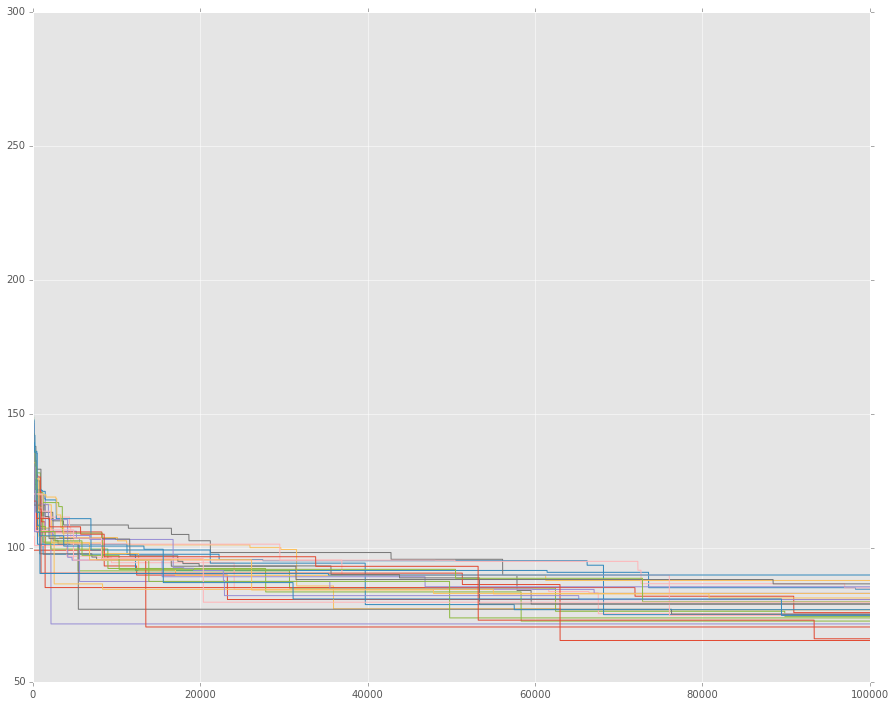

In [22]:
plt.figure(figsize=(15,12))
[plt.plot(dat) for dat in data.T]
plt.show()

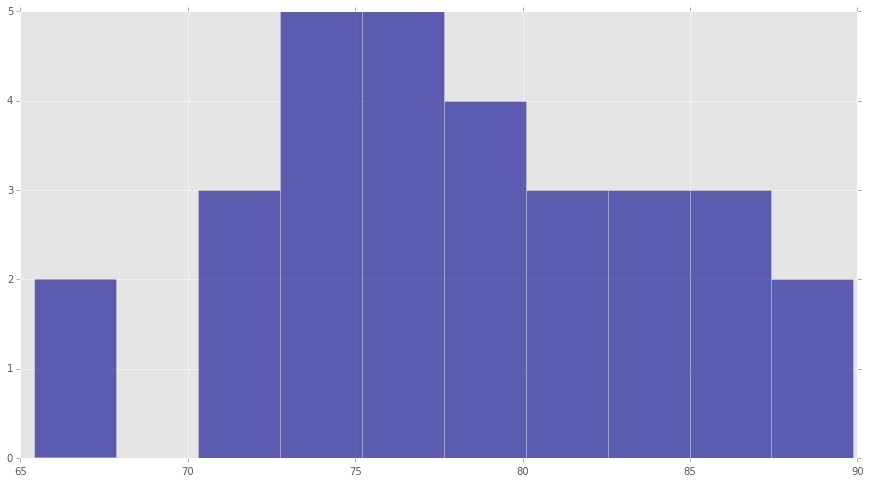

In [25]:
plt.figure(figsize=(15,8))
plt.hist(data[-1,:],color="darkblue", alpha=.6)
plt.show()

In [24]:
print data[-1]
min(data[-1])

[ 80.72368614  84.58816454  71.60949437  79.03167484  76.85902086
  74.43453703  75.41525378  75.82356969  75.08074636  83.01963485
  75.2788863   87.83677148  72.67333236  85.06290563  70.46688878
  76.92929283  85.4815889   86.5679569   81.29562423  73.85556895
  74.76762977  65.42252156  89.87289036  80.70783317  79.06239317
  83.00608601  79.89783633  79.71717907  66.06752003  74.7930361 ]


65.42252156208491

In [26]:
best_nCorrds_mIters_bit[-1]

[0.93589525384945216,
 -0.96166260505469803,
 -1.2556198356115567,
 1.083463298634942,
 0.098665043814550837,
 -1.0838884374106577,
 0.79960188327895088,
 -2.047749692924492,
 0.97868020755358998,
 -0.017537950776301426,
 1.1107644774377858,
 0.060961175633386822,
 0.0017947900447436924,
 -1.8013597145054072,
 0.90636341773392726,
 0.090064990319008928,
 2.9332995310900665,
 0.072513643628158458,
 -0.046873465445950536,
 -0.98900344051791489]